# Neural Networks
This notebook uses Artificial Neural Networks (ANNs) for classification purposes. Alternatively known as Multi-Layer Perceptron (MLP).

In [72]:
from sklearn import metrics, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_predict
from sklearn.neural_network import MLPClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [73]:
cleanData = pd.read_csv("CleanData.csv")
chosenColumns = ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 
                  'failures', 'famrel', 'freetime', 'goout', 'health', 'math', 
                  'port', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                  'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                  'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                  'higher_num', 'internet_num', 'romantic_num', 'paid_num']
cleanData = cleanData[chosenColumns]

In [74]:
# Define x and y (binary) variables for classification:

X = cleanData.drop(['Walc','Dalc'], axis=1).as_matrix()

Dalc = cleanData['Dalc'].as_matrix()
yD = Dalc > 3                             #"high" alcohol consumption = true
Walc = cleanData['Walc'].as_matrix()
yW = Walc > 3                             #"high" alcohol consumption = true

In [75]:
# Weekday drinking
numNodes = list(range(25,225,25))     # Number of nodes in hidden layer
scoresD = []
for i, nn in enumerate(numNodes):
    model = MLPClassifier(hidden_layer_sizes=(nn, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    yPredD = cross_val_predict(model, X, yD, cv=2)
    scoresD.append(metrics.accuracy_score(y_true=yD, y_pred=yPredD))
    print("Num Nodes =", nn, " || Accuracy =", scoresD[-1])

Num Nodes = 25  || Accuracy = 0.940443213296
Num Nodes = 50  || Accuracy = 0.948753462604
Num Nodes = 75  || Accuracy = 0.894736842105
Num Nodes = 100  || Accuracy = 0.925207756233
Num Nodes = 125  || Accuracy = 0.941828254848
Num Nodes = 150  || Accuracy = 0.903047091413
Num Nodes = 175  || Accuracy = 0.948753462604
Num Nodes = 200  || Accuracy = 0.948753462604


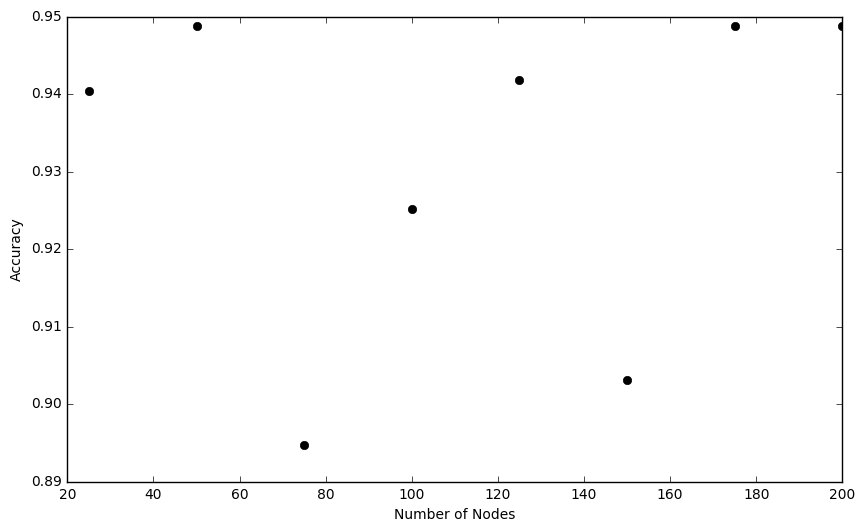

In [76]:
fig, ax1 = plt.subplots(1,1)
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.plot(numNodes, scoresD, 'ko')

Due to neural networks random initialization, this plot will look different every time. After running it several times, we noticed that 125 nodes consistently produces good results.

In [77]:
# Weekend Drinking
numNodes = list(range(25,225,25))     # Number of nodes in hidden layer
scoresW = []
for i, nn in enumerate(numNodes):
    model = MLPClassifier(hidden_layer_sizes=(nn, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    yPredW = cross_val_predict(model, X, yW, cv=2)
    scoresW.append(metrics.accuracy_score(y_true=yD, y_pred=yPredW))
    print("Num Nodes =", nn, " || Accuracy =", scoresW[-1])

Num Nodes = 25  || Accuracy = 0.948753462604
Num Nodes = 50  || Accuracy = 0.497229916898
Num Nodes = 75  || Accuracy = 0.883656509695
Num Nodes = 100  || Accuracy = 0.927977839335
Num Nodes = 125  || Accuracy = 0.932132963989
Num Nodes = 150  || Accuracy = 0.925207756233
Num Nodes = 175  || Accuracy = 0.891966759003
Num Nodes = 200  || Accuracy = 0.94459833795


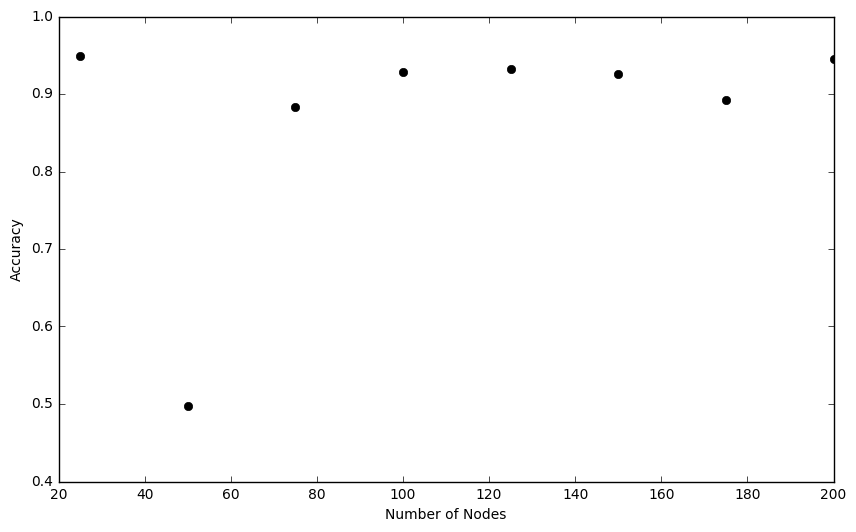

In [78]:
fig, ax1 = plt.subplots(1,1)
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.plot(numNodes, scoresW, 'ko')

125 Nodes still does ok. Let's stick with that.

In [79]:
nn = 125
modelD = MLPClassifier(hidden_layer_sizes=(nn, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
modelW = MLPClassifier(hidden_layer_sizes=(nn, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
yPredD = cross_val_predict(modelD, X, yD, cv=2)
yPredW = cross_val_predict(modelW, X, yW, cv=2)

print("Weekday Confusion Matrix")
print(metrics.confusion_matrix(y_true = yD, y_pred = yPredD))
print(metrics.accuracy_score(y_true = yD, y_pred = yPredD))
print()

print("Weekend Confusion Matrix")
print(metrics.confusion_matrix(y_true = yW, y_pred = yPredW))
print(metrics.accuracy_score(y_true = yW, y_pred = yPredW))

Weekday Confusion Matrix
[[685   0]
 [ 37   0]]
0.948753462604

Weekend Confusion Matrix
[[565   5]
 [147   5]]
0.789473684211
